<a href="https://colab.research.google.com/github/Sakshi-shaw/Data-Science-Assignment-eCommerce-Transactions-Dataset/blob/main/Shaw_Sakshi_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DB Index: 0.8956923630972515


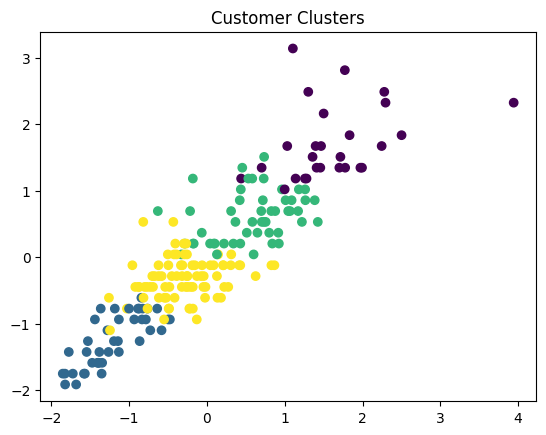

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the merged dataset
merged = pd.read_csv("/content/drive/MyDrive/merged_dataset.csv")


# Prepare Data for Clustering
cluster_data = merged.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "ProductID": lambda x: len(x.unique())
}).reset_index()

# Standardize Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data.drop("CustomerID", axis=1))

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
cluster_data["Cluster"] = cluster_labels

# Calculate DB Index
db_index = davies_bouldin_score(scaled_data, cluster_labels)
print("DB Index:", db_index)

# Visualize Clusters
import matplotlib.pyplot as plt
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap="viridis")
plt.title("Customer Clusters")
plt.show()
